In [1]:
!pip install numpy pandas opencv-python seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import os, shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


In [3]:
# Dataset Preprocessing
import zipfile
z = zipfile.ZipFile('./archive.zip')
z.extractall()

In [4]:
folder = r"/content/Training"
count = 0

for subfolder in os.listdir(folder):
    if subfolder != 'notumor':   # skip 'notumor'
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            source = os.path.join(subfolder_path, image)
            destination = os.path.join(subfolder_path, f"Y_{count}.jpg")

            os.rename(source, destination)
            count += 1

print("Renaming carried out successfully")

Renaming carried out successfully


In [5]:
folder = r"/content/Training"
count = 0

for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            source = os.path.join(subfolder_path, image)
            destination = os.path.join(subfolder_path, f"N_{count}.jpg")

            os.rename(source, destination)
            count += 1

print("Renaming carried out successfully")

Renaming carried out successfully


In [6]:
# Completed Data Preprocessing Starting EDA(Exploratory Data Analysis)

In [7]:
folder = r"/content/Training"
count_tumor = 0
count_notumor = 0
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)


4117
1595


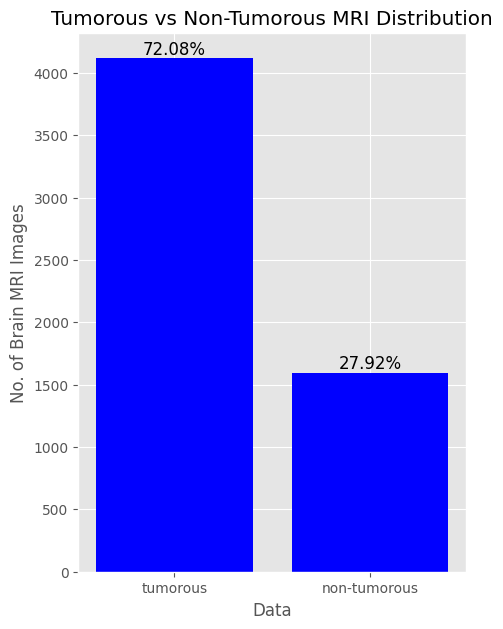

In [8]:
data = {"tumorous": count_tumor, "non-tumorous": count_notumor}
typex = list(data.keys())
values = list(data.values())

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

fig = plt.figure(figsize=(5,7))
bars = plt.bar(typex, values, color="blue")

# Add percentage text above bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%', ha='center', va='bottom', fontsize=12, color="black")

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Tumorous vs Non-Tumorous MRI Distribution")
plt.show()


In [9]:
!pip install tensorflow keras numpy pandas opencv-python seaborn matplotlib scikit-learn

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [11]:
def timing(sec_elapsed):
    h = int(sec_elapsed/(60*60))
    m = int(sec_elapsed % (60*60)/60)
    s = sec_elapsed%60
    return f"{h}:{m}:{s}"

In [12]:
def augmentation(file_dir,n_generated_samples,save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=20,
                       zoom_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.2,
                       vertical_flip=True,
                       brightness_range=(0.3,1.0),
                       horizontal_flip=True,
                       fill_mode="nearest",
                        )

    n_to_generate = n_generated_samples

    if n_to_generate <= 0:
        return
    images = os.listdir(file_dir)
    i = 0
    while i < n_to_generate:
        for filename in images:
            filepath = os.path.join(file_dir,filename)
            image = cv2.imread(filepath)
            if image is None:
                continue
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = np.expand_dims(image,axis=0)

            save_prefix = "aug_" + os.path.splitext(filename)[0]
            for batch in data_gen.flow(
                x = image,
                batch_size = 1,
                save_to_dir = save_to_dir,
                save_prefix = save_prefix,
                save_format = 'jpg'
            ):
                i += 1
                if i >= n_to_generate:
                    break
            if i >= n_to_generate:
                break



In [13]:
glioma = r"/content/Training/glioma"
meningioma = r"/content/Training/meningioma"
pituitary = r"/content/Training/pituitary"
notumor = r"/content/Training/notumor"
data_augmented_save_path = r"/content/Augmented"

glioma_count = len(os.listdir(glioma))
meningioma_count = len(os.listdir(meningioma))
pituitary_count = len(os.listdir(pituitary))
notumor_count = len(os.listdir(notumor))

tumor_count = glioma_count+meningioma_count+pituitary_count



glioma_aug = os.path.join(data_augmented_save_path, "glioma")
meningioma_aug = os.path.join(data_augmented_save_path, "meningioma")
pituitary_aug = os.path.join(data_augmented_save_path, "pituitary")
notumor_aug = os.path.join(data_augmented_save_path, "notumor")

os.makedirs(glioma_aug, exist_ok=True)
os.makedirs(meningioma_aug, exist_ok=True)
os.makedirs(pituitary_aug, exist_ok=True)
os.makedirs(notumor_aug, exist_ok=True)

if tumor_count > notumor_count:
    n_to_generate = tumor_count - notumor_count
    print(n_to_generate)
    augmentation(file_dir=notumor,n_generated_samples=n_to_generate,save_to_dir=notumor_aug)
elif notumor_count > tumor_count:
    n_to_generate = notumor_count - tumor_count
    per_class = n_to_generate // 3

    augmentation(file_dir=glioma,n_generated_samples=per_class,save_to_dir=glioma_aug)
    augmentation(file_dir=meningioma,n_generated_samples=per_class,save_to_dir=meningioma_aug)
    augmentation(file_dir=pituitary,n_generated_samples=per_class,save_to_dir=pituitary_aug)
print("augmentation completed")

2522
augmentation completed


In [14]:
folder = r"/content/Augmented"
count_tumor = 0
count_notumor = 0
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)
folder = r"/content/Training"
for subfolder in os.listdir(folder):
    if subfolder == 'notumor':   #'notumor'
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_notumor += 1
    else:
        subfolder_path = os.path.join(folder, subfolder)

        for image in os.listdir(subfolder_path):
            count_tumor += 1
print(count_tumor)
print(count_notumor)


0
2223
4117
3818


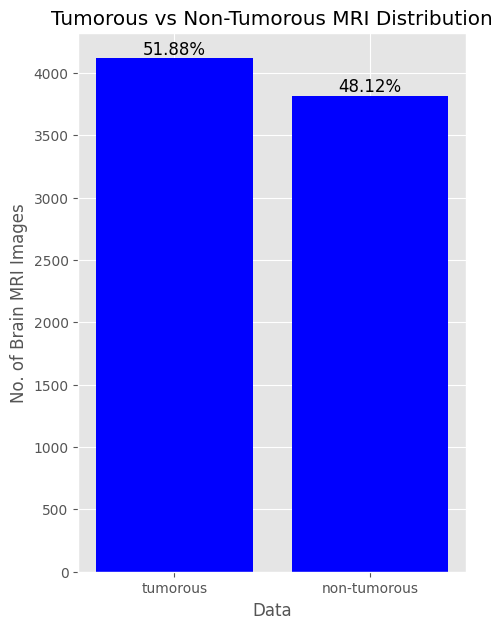

In [15]:
data = {"tumorous": count_tumor, "non-tumorous": count_notumor}
typex = list(data.keys())
values = list(data.values())

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

fig = plt.figure(figsize=(5,7))
bars = plt.bar(typex, values, color="blue")

# Add percentage text above bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.2f}%', ha='center', va='bottom', fontsize=12, color="black")

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Tumorous vs Non-Tumorous MRI Distribution")
plt.show()


In [16]:
#Data Preprocessing
#Convert BGR to GRAY
#GaussianBlur
#Threshold
#Erode
#Dilate
#Find contours

In [17]:
%pip install imutils

In [33]:
import cv2
import imutils

def crop_brain_image(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        return None  # no contours found

    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBottom = tuple(c[c[:,:,1].argmax()][0])

    # Crop the image using bounding rectangle
    cropped = image[extTop[1]:extBottom[1], extLeft[0]:extRight[0]]

    if plot:
        cv2.rectangle(image, extLeft, extRight, (0, 255, 0), 2)
        cv2.imshow("Cropped", cropped)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    return cropped
import cv2
import os
from tqdm import tqdm

def preprocess_images(input_dir, output_dir, image_size=(240,240)):
    os.makedirs(output_dir, exist_ok=True)
    for label in os.listdir(input_dir):
        class_input = os.path.join(input_dir, label)
        class_output = os.path.join(output_dir, label)
        os.makedirs(class_output, exist_ok=True)

        for filename in tqdm(os.listdir(class_input), desc=f"Processing {label}"):
            img_path = os.path.join(class_input, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue
            try:
                cropped = crop_brain_image(img)  # your crop function
                if cropped is None:
                    cropped = img
            except:
                cropped = img
            resized = cv2.resize(cropped, image_size)
            out_path = os.path.join(class_output, filename)
            cv2.imwrite(out_path, resized)

# Paths
train_path = "/content/Training"
aug_path   = "/content/Augmented"

train_preprocessed = "/content/Training_preprocessed"
val_preprocessed   = "/content/Augmented_preprocessed"

# Run preprocessing
preprocess_images(train_path, train_preprocessed, image_size=(240,240))
preprocess_images(aug_path, val_preprocessed, image_size=(240,240))



Processing meningioma: 100%|██████████| 1339/1339 [00:13<00:00, 101.41it/s]
Processing pituitary: 0it [00:00, ?it/s]
Processing notumor: 100%|██████████| 2223/2223 [00:04<00:00, 505.46it/s]
Processing glioma: 0it [00:00, ?it/s]
Processing meningioma: 0it [00:00, ?it/s]


In [41]:
import tensorflow as tf
import numpy as np
import os

def get_dataset(data_dir, image_size=(240,240), batch_size=32):
    image_paths = []
    labels = []

    # Binary class mapping
    tumor_classes = ["glioma", "meningioma", "pituitary"]

    for label_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.isdir(class_dir):
            continue

        # Assign label: 1 for tumor, 0 for no_tumor
        if label_name.lower() in tumor_classes:
            label = 1
        else:
            label = 0

        for filename in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, filename))
            labels.append(label)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

    def load_and_preprocess(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)  # scale 0-1
        img = tf.image.resize(img, image_size)
        return img, label

    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset


In [42]:
train_path = "/content/Training_preprocessed"
val_path   = "/content/Augmented_preprocessed"

image_size = (240, 240)
batch_size = 32

train_dataset = get_dataset(train_path, image_size=image_size, batch_size=batch_size)
val_dataset   = get_dataset(val_path, image_size=image_size, batch_size=batch_size)




In [22]:
#Data Splitting
#train
#test
#validation

In [24]:
%pip install tensorflow

In [43]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")   # binary classification
])

model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model_cnn.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 816s 5s/step - accuracy: 0.7433 - auc: 0.6757 - loss: 0.6906 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 3.6080
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 835s 5s/step - accuracy: 0.8114 - auc: 0.6998 - loss: 0.4955 - val_accuracy: 0.0045 - val_auc: 0.0000e+00 - val_loss: 2.5412
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 809s 5s/step - accuracy: 0.8904 - auc: 0.8270 - loss: 0.3059 - val_accuracy: 0.0054 - val_auc: 0.0000e+00 - val_loss: 2.6735
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 819s 5s/step - accuracy: 0.9333 - auc: 0.8616 - loss: 0.2258 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 4.4397
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 805s 4s/step - accuracy: 0.9404 - auc: 0.8535 - loss: 0.2214 - val_accuracy: 0.0823 - val_auc: 0.0000e+00 - val_loss: 1.5036
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 825s 5s/step - accuracy: 0.9563 - auc: 0.8966 - loss: 0.1606 - val_accuracy: 0.0090 - val_auc: 0.0000e+00 - val_loss: 2.5628
Ep

In [47]:
model_cnn.save_weights("cnn_weights.weights.h5")

In [48]:
!zip cnn_weights.zip cnn_weights.weights.h5

  adding: cnn_weights.weights.h5 (deflated 18%)


In [49]:
from google.colab import files
files.download("cnn_weights.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
model_cnn.save("cnn_model.h5")

In [51]:
!zip cnn_model.zip cnn_model.h5

  adding: cnn_model.h5 (deflated 18%)


In [52]:
files.download("cnn_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
The model predicts the image is: Non-Tumorous


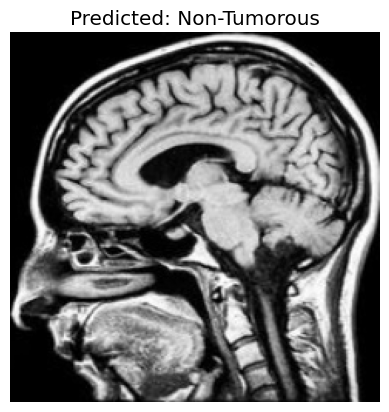

In [58]:
from tensorflow.keras.models import load_model
import random

# Load the saved model
model = load_model("cnn_model.h5")

# Function to get a random image path
def get_random_image(data_dir):
    labels = os.listdir(data_dir)
    random_label = random.choice(labels)
    class_dir = os.path.join(data_dir, random_label)
    images = os.listdir(class_dir)
    random_image = random.choice(images)
    return os.path.join(class_dir, random_image)

# Get a random image from the training data
random_image_path = "/content/Training_preprocessed/notumor/N_0.jpg"

# Load and preprocess the image
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = cv2.resize(img, (240, 240))  # Resize to model input size
img = np.expand_dims(img, axis=0) / 255.0  # Add batch dimension and normalize

# Make a prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > 0.5:
    predicted_label = "Tumorous"
else:
    predicted_label = "Non-Tumorous"

print(f"The model predicts the image is: {predicted_label}")

# Display the image
plt.imshow(img[0])
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

In [ ]:
|